# Wine Quality Prediction Using Random Forest

In [500]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as seaborn
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

In [501]:
data=pd.read_csv('wine.csv')

###### Checking For Null Values

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
winecolor               6497 non-null object
quality                 6497 non-null object
dtypes: float64(11), object(2)
memory usage: 659.9+ KB


No Null Values Found.

###### Checking for Correlation

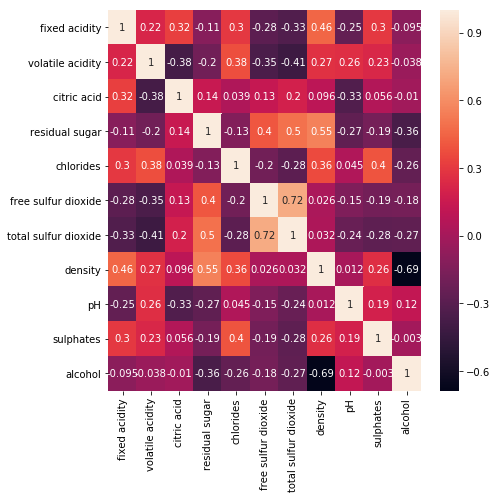

In [503]:
plt.figure(figsize=(7,7))
sb.heatmap(data.corr(),annot=True)

Neither of the features seems to be correlated to one another. So, including them all for prediction.

### Feature Analysis

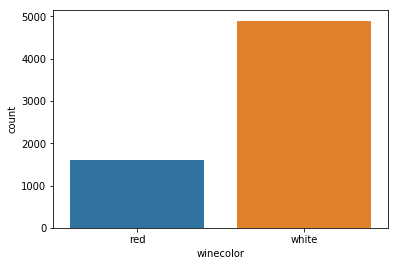

In [504]:
sb.countplot(data.winecolor)

### Bivariate Analysis

Text(0,0.5,'percentage of quality category')

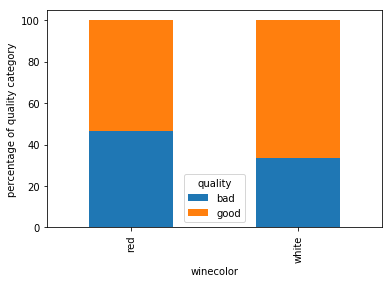

In [505]:
column_count=data.winecolor.value_counts()
grouped_data=data.groupby(['winecolor','quality']).size().astype(float)
for category in grouped_data.index.levels[0]:
    for quality in grouped_data[category].index:
        grouped_data[category][quality]=grouped_data[category][quality]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of quality category')

### Label Encoding

In [506]:
lb=LabelEncoder()

In [507]:
data.winecolor=lb.fit_transform(data.winecolor)
data.quality=lb.fit_transform(data.quality)

### Train Test Split

In [510]:
train, test = train_test_split(data, test_size = 0.25)

In [ ]:
predictors = data.columns
predictors=predictors.drop('quality')
target='quality'

### Classification Model

Let's try Logistic Regression.

In [511]:
model=LogisticRegression()
scores = cross_val_score(estimator= model, X = train[predictors], 
                         y = train[target], scoring = "accuracy", cv=10)                              

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.71516393 0.73155738 0.73565574 0.77663934 0.76229508 0.74743326
 0.73305955 0.74074074 0.74074074 0.7345679 ]
Average accuracy:  0.7417853671267569


Logistic Regression is not performing well. So, let's try DecisionTreeClassifier.

In [512]:
model = tree.DecisionTreeClassifier()
scores = cross_val_score(estimator= model, X = train[predictors], 
                         y = train[target], scoring = "accuracy", cv=10)                              

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.75819672 0.76639344 0.73770492 0.79508197 0.76844262 0.76180698
 0.78439425 0.77160494 0.75720165 0.74074074]
Average accuracy:  0.7641568229266882


In [513]:
predictors=['alcohol','volatile acidity','density','chlorides','citric acid']
model = DecisionTreeClassifier()
scores = cross_val_score(estimator= model, X = train[predictors], 
                         y = train[target], scoring = "accuracy", cv=10)                              

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.72131148 0.72745902 0.72336066 0.80327869 0.77459016 0.73921971
 0.75975359 0.74279835 0.74897119 0.69135802]
Average accuracy:  0.7432100877971287


Let's have a look at how Random Forest performs.

In [515]:
predictors = data.columns
predictors=predictors.drop('quality')

model = RandomForestClassifier(n_estimators=200,min_samples_split=50, max_depth=9)

cv = KFold(n=len(train), n_folds=10, random_state=12)
    
fold_accuracy = []

for train_fold, test_fold in cv:
    train_X = train[predictors].iloc[train_fold,:] 
    train_Y = train[target].iloc[train_fold]

    test_X = train[predictors].iloc[test_fold,:] 
    test_Y = train[target].iloc[test_fold]

    fmodel = model.fit(X = train_X, y = train_Y)
    valid_acc = fmodel.score(X = test_X, y = test_Y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, " ")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.7274590163934426, 0.7909836065573771, 0.7618069815195072, 0.811088295687885, 0.7946611909650924, 0.7864476386036962, 0.7659137577002053, 0.7802874743326489, 0.757700205338809, 0.7618069815195072]  
Average accuracy:  0.7738155148618171


In [516]:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(featimp)

alcohol                 0.277367
volatile acidity        0.146717
density                 0.115719
chlorides               0.074421
free sulfur dioxide     0.066527
citric acid             0.060977
sulphates               0.060785
residual sugar          0.058959
total sulfur dioxide    0.057403
pH                      0.038219
fixed acidity           0.036818
winecolor               0.006088
dtype: float64


In [517]:
predictors=['alcohol','volatile acidity','density','citric acid','free sulfur dioxide']
model = RandomForestClassifier(n_estimators=200,min_samples_split=50, max_depth=9)
scores = cross_val_score(estimator= model, X = train[predictors], 
                         y = train[target], scoring = "accuracy", cv=10)                              

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.73565574 0.77254098 0.74385246 0.80532787 0.75614754 0.75359343
 0.77002053 0.75720165 0.76131687 0.76748971]
Average accuracy:  0.7623146783655623


RandomForest is surely performing better than DecisionTreeClassifier. Let's check RandomForest for different depths.

###### Checking For Depth

In [518]:
predictors = data.columns
predictors=predictors.drop('quality')

for i in range(5,15,2):
    
    model = RandomForestClassifier(n_estimators=200,min_samples_split=50, max_depth=i)
    
    cv = KFold(n=len(train), n_folds=10, random_state=12)
    
    fold_accuracy = []

    for train_fold, test_fold in cv:
        
        train_X = train[predictors].iloc[train_fold,:] 
        train_Y = train[target].iloc[train_fold]

        test_X = train[predictors].iloc[test_fold,:] 
        test_Y = train[target].iloc[test_fold]

        fmodel = model.fit(X = train_X, y = train_Y)
        valid_acc = fmodel.score(X = test_X, y = test_Y)
        fold_accuracy.append(valid_acc)    
        
    print("For Depth ",i,"\n")
    print("Accuracy per fold: ", fold_accuracy, " ")
    print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))
    print("Test Accuracy: ",fmodel.score(test[predictors],test[target]),"\n")

For Depth  5 

Accuracy per fold:  [0.7172131147540983, 0.7684426229508197, 0.7330595482546202, 0.7946611909650924, 0.7741273100616016, 0.757700205338809, 0.757700205338809, 0.7597535934291582, 0.7412731006160165, 0.7535934291581109]  
Average accuracy:  0.7557524320867136
Test Accuracy:  0.7643076923076924 

For Depth  7 

Accuracy per fold:  [0.7254098360655737, 0.7766393442622951, 0.7453798767967146, 0.8049281314168378, 0.7802874743326489, 0.7823408624229979, 0.7761806981519507, 0.7802874743326489, 0.757700205338809, 0.7659137577002053]  
Average accuracy:  0.7695067660820682
Test Accuracy:  0.7766153846153846 

For Depth  9 

Accuracy per fold:  [0.7315573770491803, 0.7930327868852459, 0.7515400410677618, 0.8090349075975359, 0.7905544147843943, 0.7864476386036962, 0.7679671457905544, 0.7761806981519507, 0.7638603696098563, 0.7741273100616016]  
Average accuracy:  0.7744302689601777
Test Accuracy:  0.7803076923076923 

For Depth  11 

Accuracy per fold:  [0.7397540983606558, 0.79508

Depth 13 seems to be the best out of all. 

###### Hence, the final model has the accuracy of 78.07% on training data and 78.21% on test data.